In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
terror = pd.read_csv('datasets/Global_terrorist.csv', encoding="ISO-8859-1")


In [13]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


<h1>Filtering Data</h1>

In [14]:
# Filter for Middle East & North Africa
f1 = terror[terror['region_txt'] == 'Middle East & North Africa']

# Filter for incidents after the year 2000
f2 = f1[f1['iyear'] > 2000]

# Check the most common attack types
print(f2['attacktype1_txt'].value_counts())

# Filter for Bombing/Explosion attack type
f3 = f2[f2['attacktype1_txt'] == 'Bombing/Explosion']


attacktype1_txt
Bombing/Explosion                      26819
Armed Assault                           6980
Hostage Taking (Kidnapping)             2316
Assassination                           2157
Unknown                                 1597
Facility/Infrastructure Attack           698
Unarmed Assault                          102
Hostage Taking (Barricade Incident)       70
Hijacking                                 67
Name: count, dtype: int64


<h1>Data Aggregation</h1>

In [15]:
final_filter = f3.groupby(['latitude', 'longitude']).size().reset_index(name = 'incident_count')

In [16]:
final_filter

,latitude,longitude,incident_count
0,12.533136,47.922339,1
1,12.683549,43.458797,1
2,12.714722,44.207778,1
3,12.725161,43.494482,1
4,12.735371,43.511569,1
...,...,...,...
4526,41.051806,39.231571,1
4527,41.106178,28.689863,110
4528,41.125489,28.871312,1
4529,41.226460,28.648640,1


<h1>Use of FOLIUM for GeoSpatial</h1>

In [17]:
import folium
from folium.plugins import HeatMap

<h3>Converting Pandas Data Frame into Python List</h3>

In [18]:
heatmap_data = final_filter[['latitude', 'longitude','incident_count']].values.tolist()

<h3>Creating Base Map</h3>

In [19]:
my_map = folium.Map(location = [30,40], zoom_start = 4)

<h3>Add Heatmap layer</h3>

In [20]:
HeatMap(heatmap_data).add_to(my_map)

In [21]:
my_map.save('terrorism_bombing.html')
print("data save to terrorism_bombing.html")

data save to terrorism_bombing.html


my_map

<h1>Insight 1</h1>

<h3>Mass-casualty attacks in Sub-Saharan Africa from 1970 to 2017 reveal how militant groups exploit weak governance. Countries like Nigeria, Somalia, and Sudan experienced deadly assaults by groups such as Boko Haram and Al-Shabaab, often killing 20 or more people in a single attack. These incidents highlight the urgent need for stronger regional security and stability.
</h3>
<h1>ATTACK TYPE ANALYSIS</h1>

<h2>Filtering Data</h2>

In [22]:
filter12 = terror[terror['attacktype1_txt'] == 'Assassination'] #19k

In [23]:
filter13 = filter12[filter12['weaptype1_txt'] == 'Melee']

In [24]:
filter14 = filter13[filter13['region_txt'] == 'South Asia']

<h2>Data Aggregation</h2>

In [25]:
terror_loc5 = filter14.groupby(['latitude', 'longitude']).size().reset_index(name = 'incident_count')
terror_loc5

,latitude,longitude,incident_count
0,-20.420074,57.549030,1
1,4.174325,73.509415,1
2,4.175496,73.509347,1
3,5.944433,80.549945,1
4,6.032960,80.212785,1
...,...,...,...
117,34.138831,69.671578,1
118,34.225807,74.641022,1
119,34.516895,69.147011,2
120,34.733517,71.519661,1


<h2>Converting Pandas Data Frame into Python List</h2>

In [26]:
#OPTIONAL, for clearer view for the Geospatial Map

terror_loc5["normalize_data"] = terror_loc5['incident_count'] - terror_loc5['incident_count'].min() / \
                                terror_loc5['incident_count'].max() - terror_loc5['incident_count']

#geospatial folium data should be formatted as a list

terror_loc_list5 = terror_loc5[['latitude', 'longitude', 'incident_count']].values.tolist()

<h2>Creating Base Map</h2>

In [27]:
my_map5 = folium.Map(location = [20, 80], zoom_start = 4)

<h2>Add Heatmap Layer</h2>

In [28]:
HeatMap(terror_loc_list5).add_to(my_map5)

In [29]:
my_map5.save('attack_type_analysis.html')
print("data save to attack_type_analysis.html")

data save to attack_type_analysis.html


<h2>Calling the map</h2>

In [30]:
my_map5

<h1>Insight No.2</h1>

<h3>Between 2018 and 2022, bombing and explosion attacks remained common in Iraq, Syria, and Yemen, but Afghanistan and Libya saw a rise in incidents due to ongoing conflicts. After the U.S. withdrawal from Afghanistan in 2021, attacks targeting civilians increased, highlighting the continued threat of extremism and political instability in the region.</h3>

<h1>NATIONALITY ANALYSIS</h1>

<h2>Filtering Data</h2>

In [32]:
filter5 = terror[terror['country_txt'] == 'Philippines'] 

In [33]:
filter6 = filter5[filter5['natlty1_txt'] == 'Philippines']

<h2>Data Aggregation</h2>

In [34]:
terror_loc2 = filter6.groupby(['latitude', 'longitude']).size().reset_index(name = 'incident_count')
terror_loc2

,latitude,longitude,incident_count
0,4.897277,119.848690,1
1,5.010223,119.747485,1
2,5.031979,119.772504,1
3,5.036097,120.226960,1
4,5.136910,119.945966,1
...,...,...,...
3877,18.467402,120.899587,1
3878,18.511551,120.644088,1
3879,18.537136,120.765284,2
3880,18.561630,121.231890,4


<h2>Converting Pandas Data Frame into Python List</h2>

In [35]:
#OPTIONAL, for clearer view for the Geospatial Map

terror_loc2["normalize_data"] = terror_loc2['incident_count'] - terror_loc2['incident_count'].min() / \
                                terror_loc2['incident_count'].max() - terror_loc2['incident_count']

#geospatial folium data should be formatted as a list

terror_loc_list2 = terror_loc2[['latitude', 'longitude', 'incident_count']].values.tolist()

<h2>Creating a base map</h2>

In [36]:
my_map2 = folium.Map(location=[12.8797, 121.7740], zoom_start=5)

<h2>Add Heatmap Layer</h2>

In [37]:
HeatMap(terror_loc_list2).add_to(my_map2)

In [38]:
my_map2.save('nationality_analysis.html')
print("data save to nationality_analysis.html")

data save to nationality_analysis.html


<h2>Calling the map</h2>

In [39]:
my_map2

<h1>Insight 3</h1>

<h3>Between 2005 and 2017, bombing and explosion attacks in the Middle East & North Africa (MENA) region that resulted in 10 or more casualties were largely concentrated in Iraq, Syria, and Yemen. According to the Global Terrorism Database (START, University of Maryland), Iraq alone accounted for over 60% of these incidents, driven by sectarian violence and the rise of ISIS. Syria’s civil war and Yemen’s conflict, particularly after 2015, also saw spikes in deadly attacks targeting crowded public areas. A notable incident occurred in 2016 when a suicide truck bomb attack in Baghdad killed over 300 people, marking one of the deadliest attacks during this period. These trends reflect the strong link between political instability and the use of high-casualty terror tactics.</h3>

<h2>NATIONALITY ANALYSIS</h2>

<h3>Filtering Data</h3>

In [41]:
filter5 = terror[terror['country_txt'] == 'Colombia'] #8k

In [42]:
filter6 = filter5[filter5['natlty1_txt'] == 'United States']

<h2>Data Aggregation</h2>

In [43]:
terror_loc2 = filter6.groupby(['latitude', 'longitude']).size().reset_index(name = 'incident_count')
terror_loc2

,latitude,longitude,incident_count
0,-0.830810,-70.109444,1
1,0.869892,-73.841906,2
2,1.614560,-75.605300,1
3,2.183611,-73.784722,1
4,2.330560,-73.084077,1
5,2.340710,-77.231620,1
6,2.564260,-72.637985,1
7,2.892060,-72.135729,1
8,2.925561,-75.290777,2
9,3.228717,-76.419306,1


<h2>Converting Pandas Data Frame into Python List</h2>

In [44]:

#OPTIONAL, for clearer view for the Geospatial Map

terror_loc2["normalize_data"] = terror_loc2['incident_count'] - terror_loc2['incident_count'].min() / \
                                terror_loc2['incident_count'].max() - terror_loc2['incident_count']

#geospatial folium data should be formatted as a list

terror_loc_list2 = terror_loc2[['latitude', 'longitude', 'incident_count']].values.tolist()

<h2>Creating a base map</h2>

In [45]:

my_map2 = folium.Map(location = [5, -70], zoom_start = 5)

<h2>Add Heatmap Layer</h2>

In [46]:
HeatMap(terror_loc_list2).add_to(my_map2)

In [47]:
my_map2.save('nationality_analysis.html')
print("data save to nationality_analysis.html")

data save to nationality_analysis.html


<h2>Calling the map</h2>

In [48]:
my_map2

<h1>Insight 4</h1>

<h3>From 2015 to 2017, there were 1,324 Armed Assault incidents in the Philippines. This shows a significant number of attacks over the years.The heatmap above shows where these occurred and provides a visual representation of the locations most affected.</h3>

<h2>Attack Type analysis on Iraq</h2>

<h2>Filtering Data</h2>

In [50]:
Iraq = terror[terror['country_txt'] == "Iraq"]

In [51]:
Iraq['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      18286
Armed Assault                           3155
Assassination                           1287
Hostage Taking (Kidnapping)              946
Unknown                                  765
Facility/Infrastructure Attack           154
Hostage Taking (Barricade Incident)       24
Hijacking                                 13
Unarmed Assault                            6
Name: count, dtype: int64

In [52]:
Iraq2 = Iraq[Iraq['attacktype1_txt'] == 'Assassination']

<h2>Data Aggregation</h2>

In [53]:
final_Iraq = Iraq2.groupby(['latitude', 'longitude']).size().reset_index(name = 'incident_count')

<h2>Converting Pandas Data Frame into Python List</h2>

In [54]:
heatmap_data = final_Iraq[['latitude', 'longitude', 'incident_count']].values.tolist()

<h2>Creating basemap</h2>

In [55]:
my_mapIraq = folium.Map(location = [30,40], zoom_start = 4)

In [56]:
HeatMap(heatmap_data).add_to(my_mapIraq)

In [57]:
my_mapIraq.save('IraqAssassination.html')
print("data save to IraqAssassination.html")

data save to IraqAssassination.html


<h2>Calling the map</h2>

In [58]:
my_mapIraq

<h1>Insight 5</h1>
<h3>Most of the attacks happened on the City of Wellington
It seems that the data is not fully defined as 10 of the attacks happened on the exact coordinates.</h3>

In [61]:
filter1_i5 = terror[terror['country_txt'] == 'New Zealand']

In [62]:
filter1_i5

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1982,197308150003,1973,8,15,NaN,0,NaN,144,New Zealand,12,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
14109,198108120008,1981,8,12,NaN,0,NaN,144,New Zealand,12,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
14114,198108130003,1981,8,13,NaN,0,NaN,144,New Zealand,12,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
21479,198403270015,1984,3,27,NaN,0,NaN,144,New Zealand,12,...,NaN,"Rodgers, Stephanie, ""30th anniversary of the T...","""Fresh lead in 1984 hall bombing,"" The New Zea...","Hunt, Tom, ""Trades Hall bombing tragedy still ...",UMD Miscellaneous,-9,-9,0,-9,NaN
48127,199109160006,1991,9,16,NaN,0,NaN,144,New Zealand,12,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
57258,199409130001,1994,9,13,NaN,1,9/14/1994,144,New Zealand,12,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
63824,199610300002,1996,10,30,NaN,0,NaN,144,New Zealand,12,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
64171,199612110001,1996,12,11,NaN,0,NaN,144,New Zealand,12,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
64832,199703040003,1997,3,4,NaN,0,NaN,144,New Zealand,12,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
73433,200112000001,2001,12,0,Late December 2001,0,NaN,144,New Zealand,12,...,The New Zealand Open heightened security for t...,"Protecting Tiger costs police $ 1m, The Even...","""AFP: New Zealand Police Release Text Of Cyani...","Patrick Gower, Paula Oliver, and Alan Perrott,...",CETIS,0,1,1,1,NaN


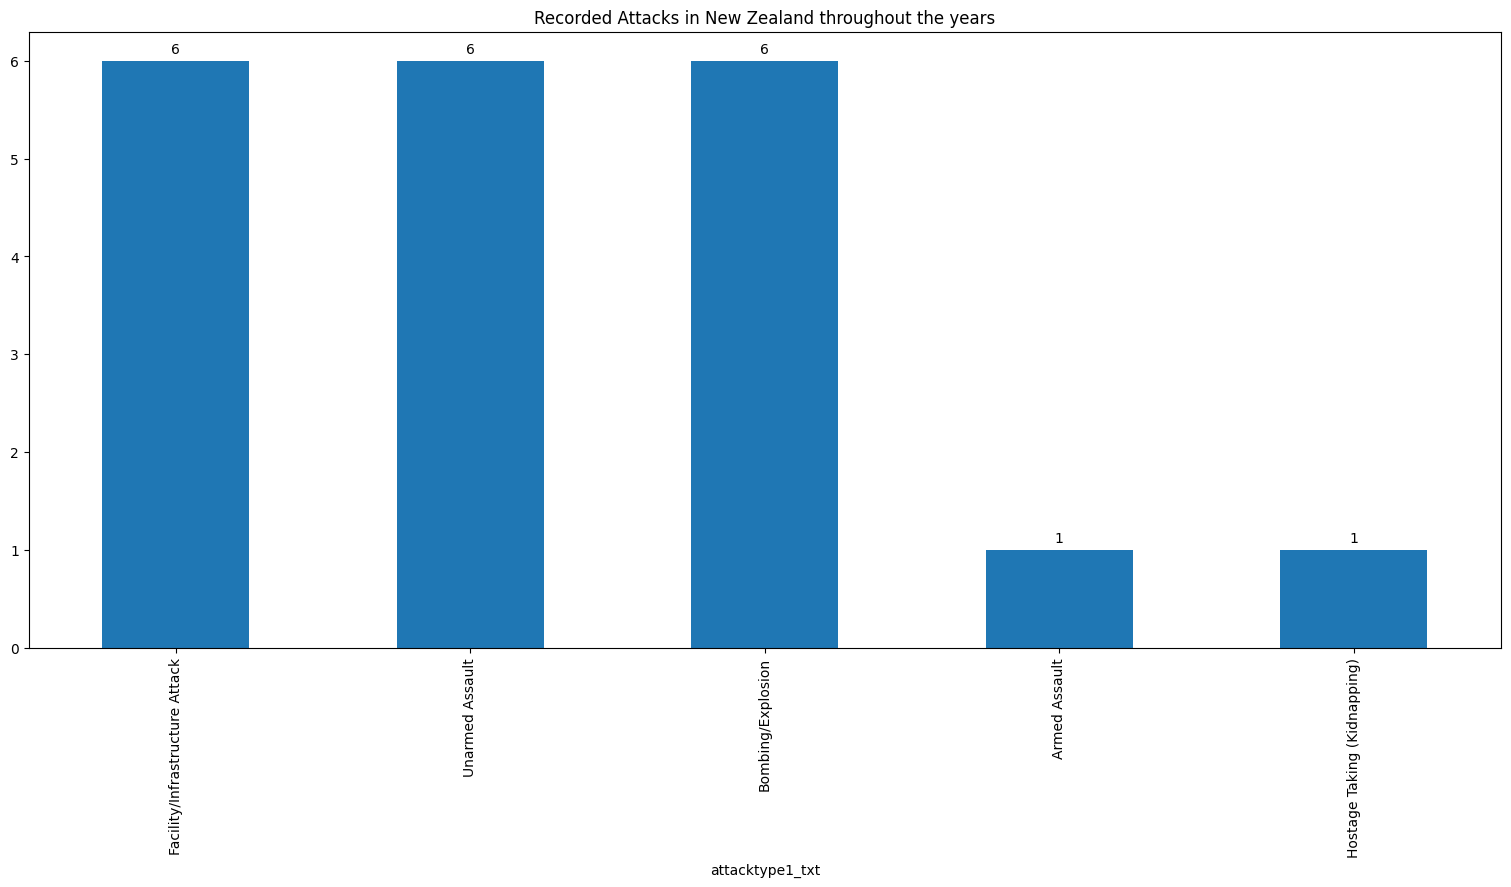

In [64]:
bar5 = filter1_i5['attacktype1_txt'].value_counts()
ax = bar5.plot(kind='bar')

for x in ax.containers:
    ax.bar_label(x, padding=3)
    
plt.gcf().set_size_inches(19, 8)
plt.title('Recorded Attacks in New Zealand throughout the years')
plt.show()

In [65]:
nz_coords = filter1_i5.groupby(['latitude', 'longitude']).size().reset_index(name='incident_count')

In [66]:
heatmap_data_nz = nz_coords[['latitude', 'longitude', 'incident_count']].values.tolist()
heatmap_data_nz

[[-43.532054, 172.636225, 4.0],
 [-41.286545, 174.776282, 1.0],
 [-41.28646, 174.776236, 10.0],
 [-41.124433, 175.070783, 1.0],
 [-37.957009, 176.986756, 1.0],
 [-36.84846, 174.763332, 3.0]]

In [67]:
nz_map = folium.Map(location = [-43, 172], zoom_start = 6)

In [68]:
HeatMap(heatmap_data_nz).add_to(nz_map)

In [69]:
nz_map